In [44]:
import seaborn as sns
import pandas as pd
import numpy as np
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
sns.set_style('whitegrid')

In [45]:
df=pd.read_csv('../data/windrose_data.csv', index_col=0)

In [46]:
sites = ['Sjever','Jug','Zapad','Istok']
factors_wind_speed = ['Nord_Windspeed','Sud_Windspeed','West_Windspeed','Ost_Windspeed']
factors_wind_direction = ['Nord_Winddirection','Sud_Winddirection','West_Winddirection','Ost_Winddirection']

# funckija za windrose za sve podatke

In [20]:
def windrose(site_1,speed_1,direction_1):
    df_fun = df.copy()
    df_windrose_factor_ws = df_fun[speed_1]
    df_windrose_factor_wd = df_fun[direction_1]
    ax = WindroseAxes.from_ax()
    ax.bar(df_windrose_factor_wd,df_windrose_factor_ws,opening=.9,edgecolor='white')
    ax.set_title(site_1)
    ax.legend(bbox_to_anchor=(1.0, 1.0),fontsize=12)
    ax.set_xticklabels(['N', 'NW',  'W', 'SW', 'S', 'SE','E', 'NE'])
    ax.set_theta_zero_location('N')
    return ax

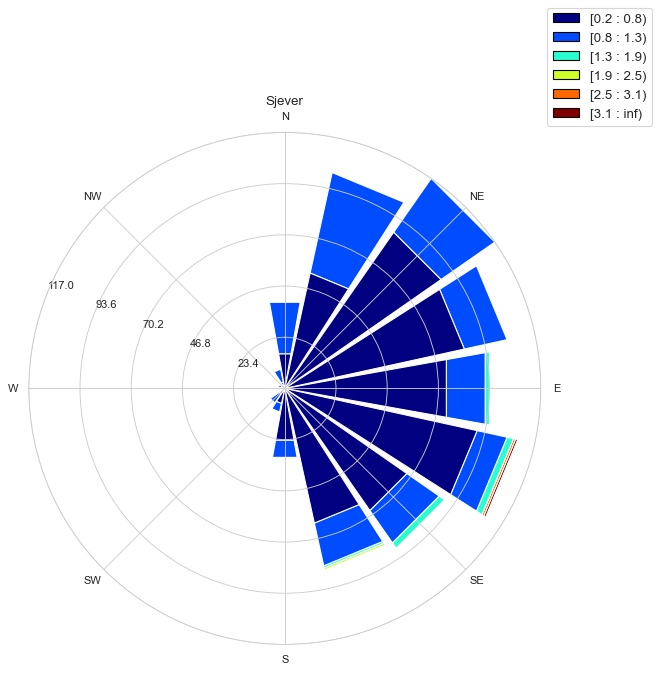

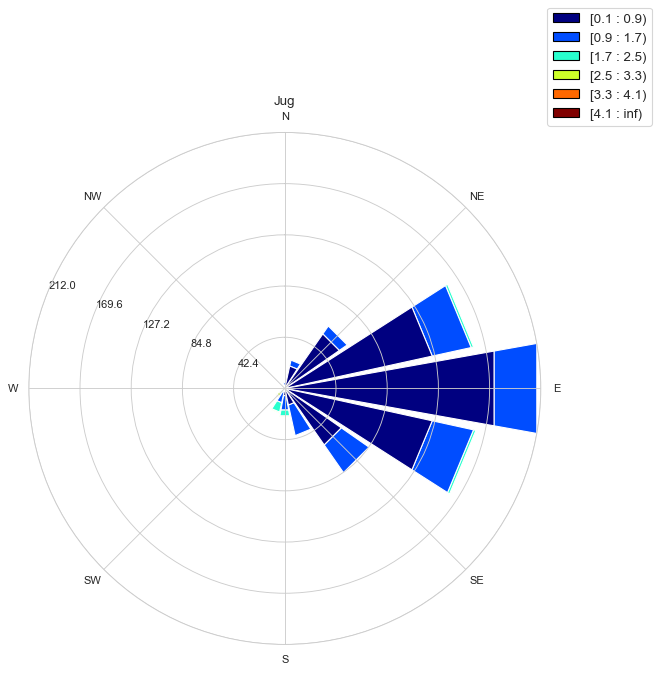

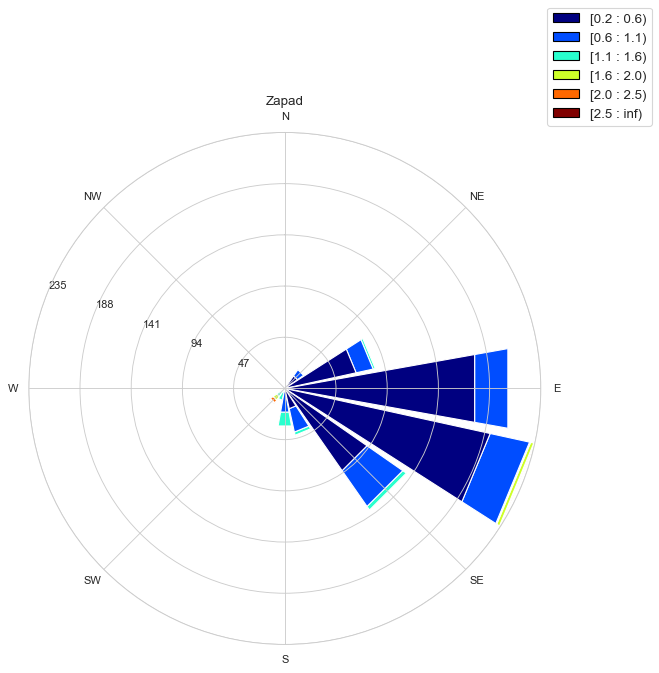

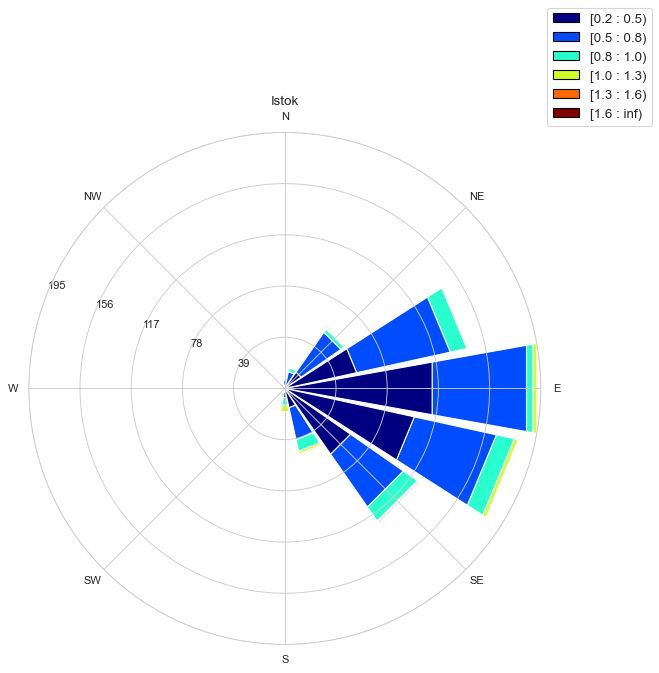

In [21]:
for site,speed,direction in zip(sites,factors_wind_speed,factors_wind_direction):
    graf = windrose(site,speed,direction)

# funckija za godisnja doba 

In [38]:
def windrose_season(site_1,speed_1,direction_1,season_1,title):
    df_fun = df.copy()
    df_fun = df_fun[(df_fun[[season]].select_dtypes(include=['number']) != 0).any(1)]
    df_windrose_factor_ws = df_fun[speed_1]
    df_windrose_factor_wd = df_fun[direction_1]
    ax = WindroseAxes.from_ax()
    ax.bar(df_windrose_factor_wd,df_windrose_factor_ws,opening=.9,edgecolor='white')
    ax.set_title(site_1 +' '+ title)
    ax.legend(bbox_to_anchor=(1.0, 1.0),fontsize=12)
    ax.set_xticklabels(['N', 'NW',  'W', 'SW', 'S', 'SE','E', 'NE'])
    ax.set_theta_zero_location('N')
    return ax 


In [47]:
df.columns

Index(['Nord_Windspeed', 'Ost_Windspeed', 'Sud_Windspeed', 'West_Windspeed',
       'Nord_Winddirection', 'Ost_Winddirection', 'Sud_Winddirection',
       'West_Winddirection', 'Jesen', 'Proljece', 'Ljeto', 'Zima'],
      dtype='object')

In [48]:
seasons = ['Jesen', 'Proljece', 'Ljeto','Zima']

In [49]:
titles = ['Jesen', 'Proljeće', 'Ljeto','Zima']

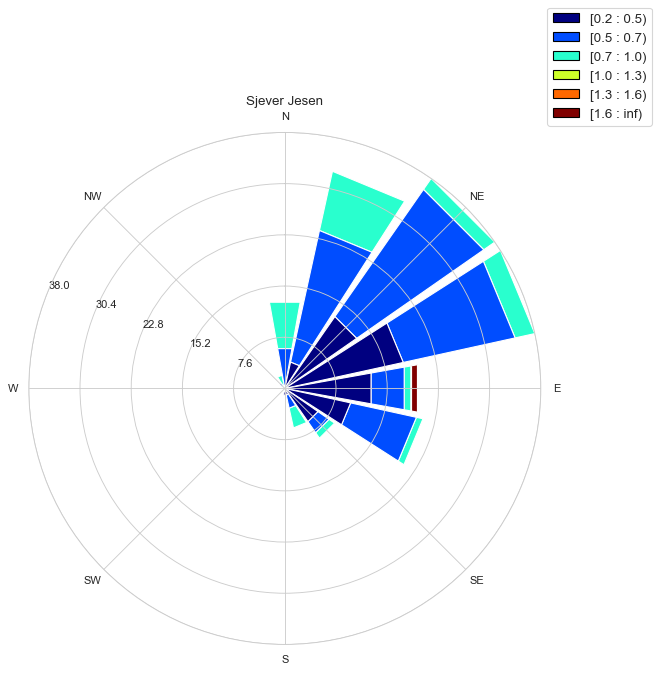

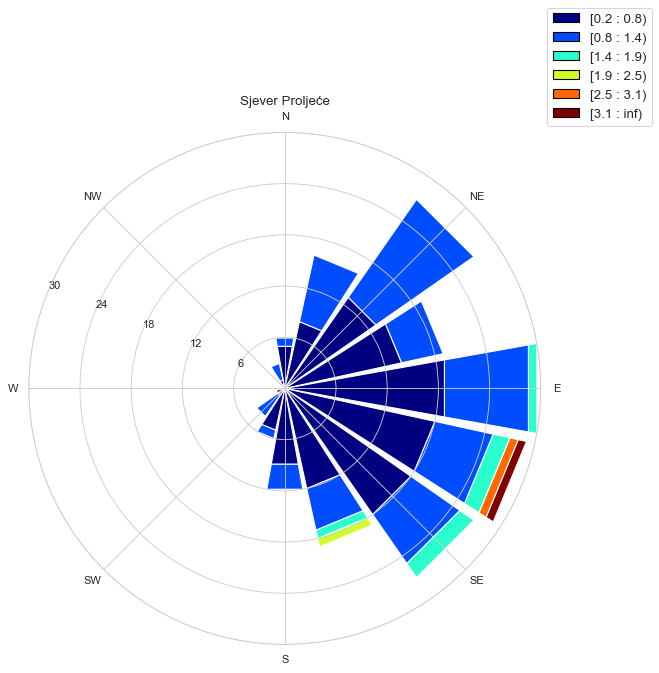

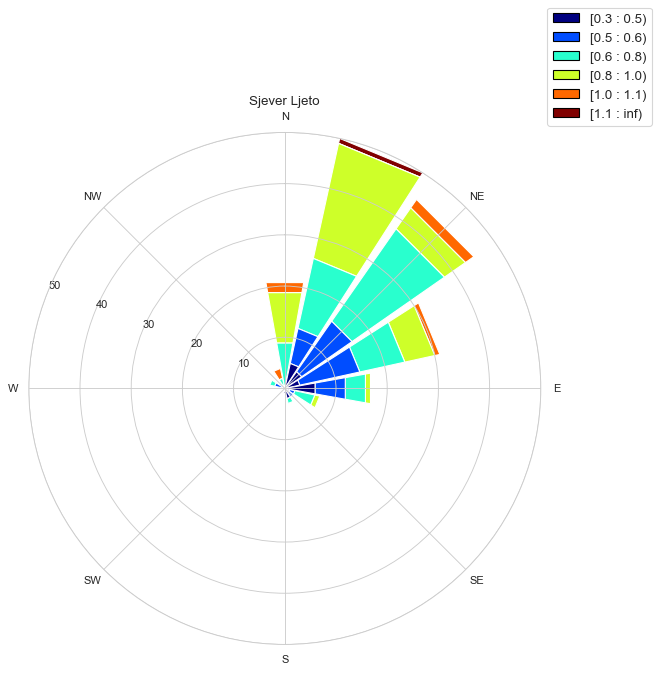

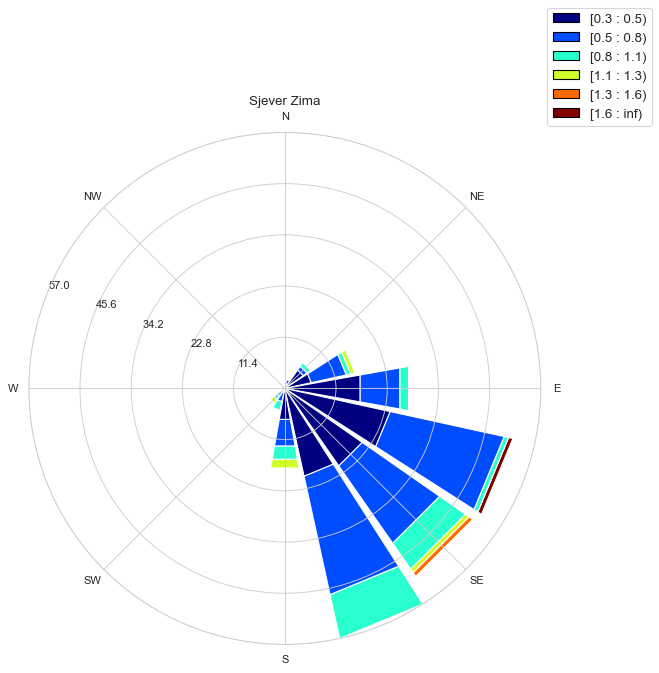

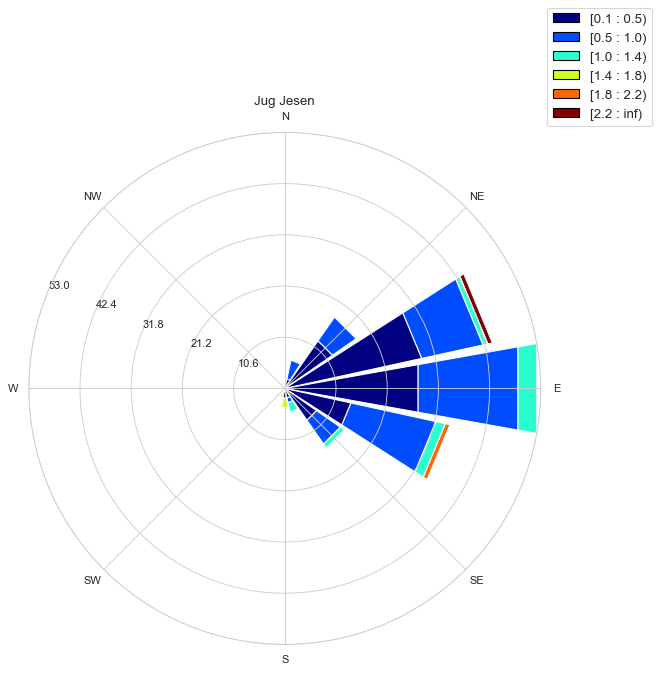

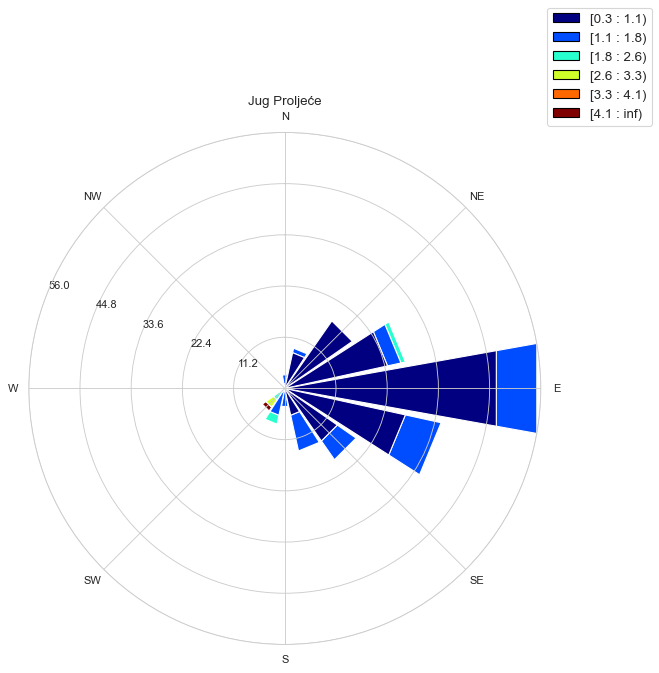

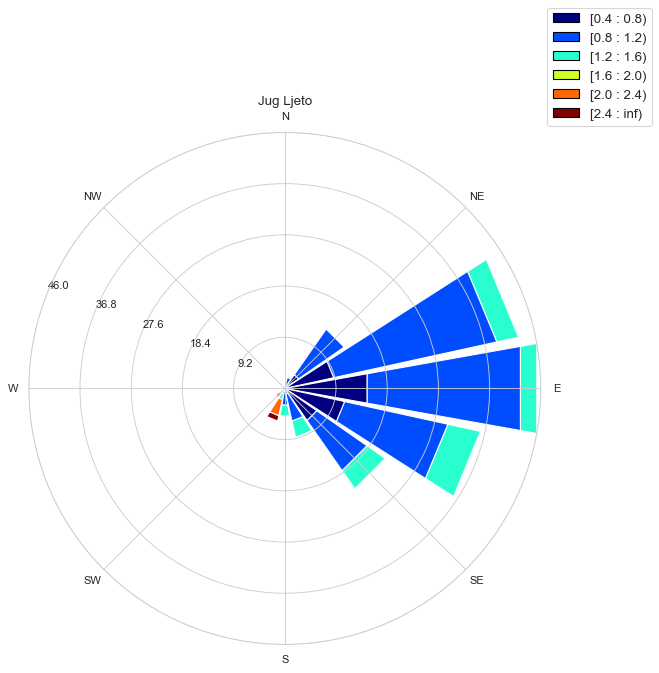

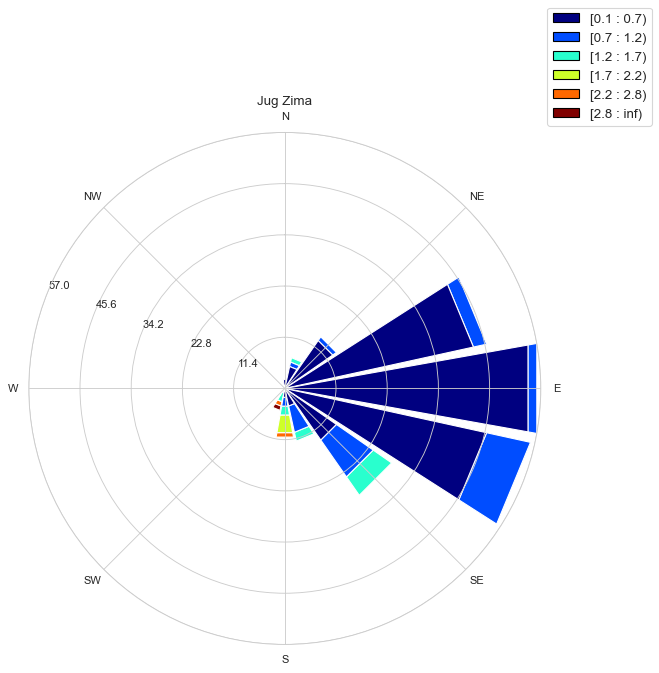

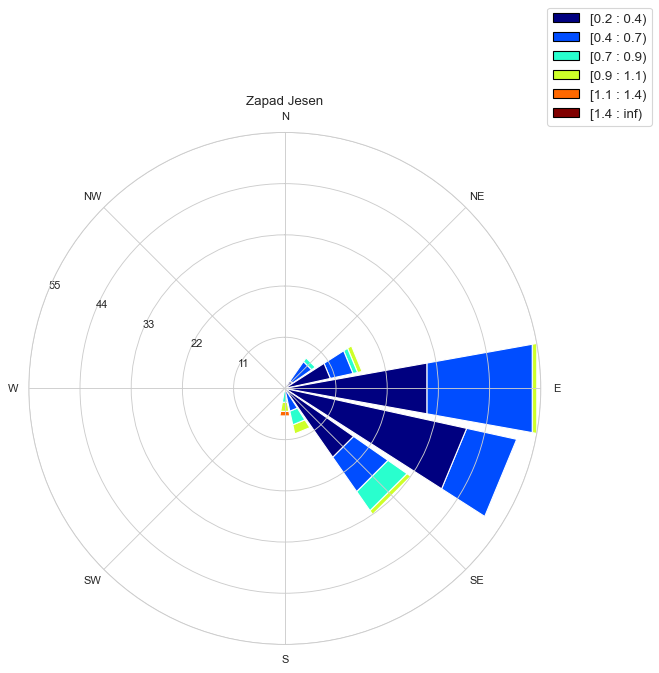

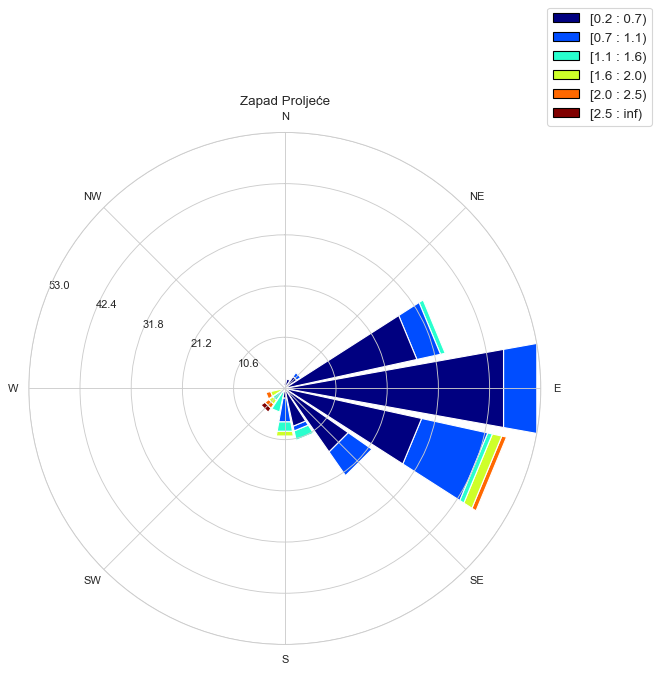

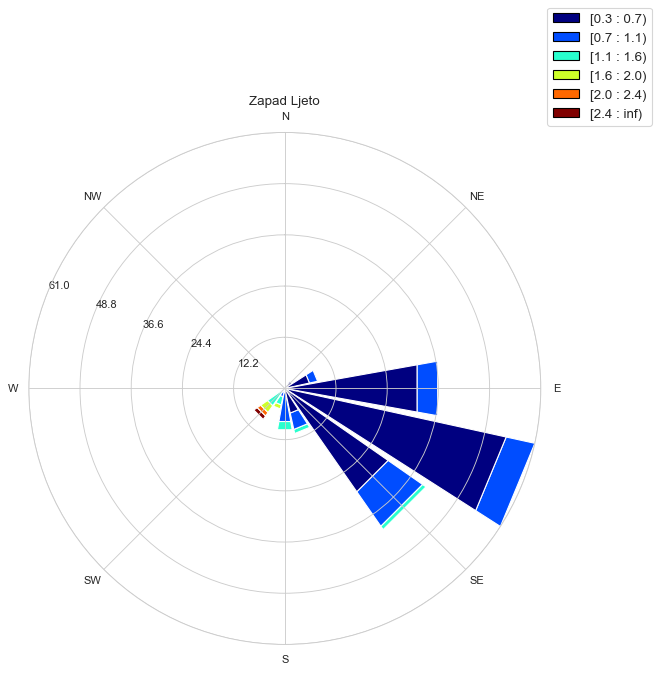

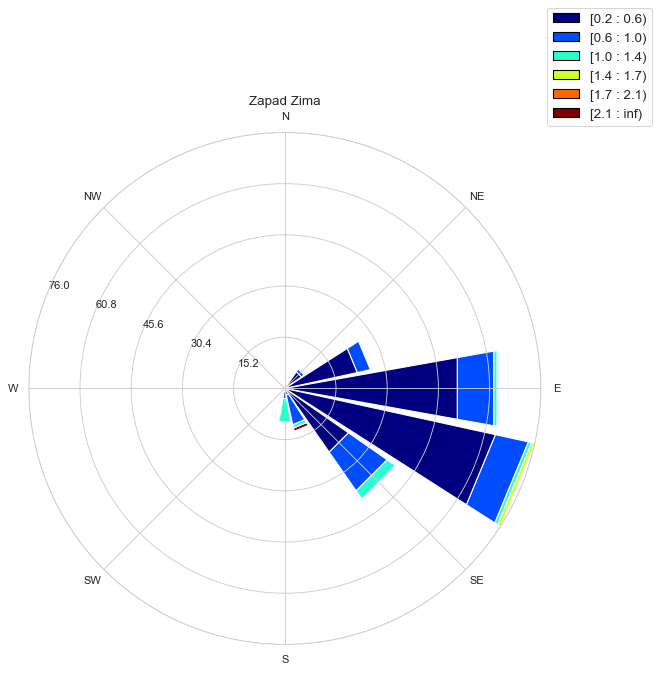

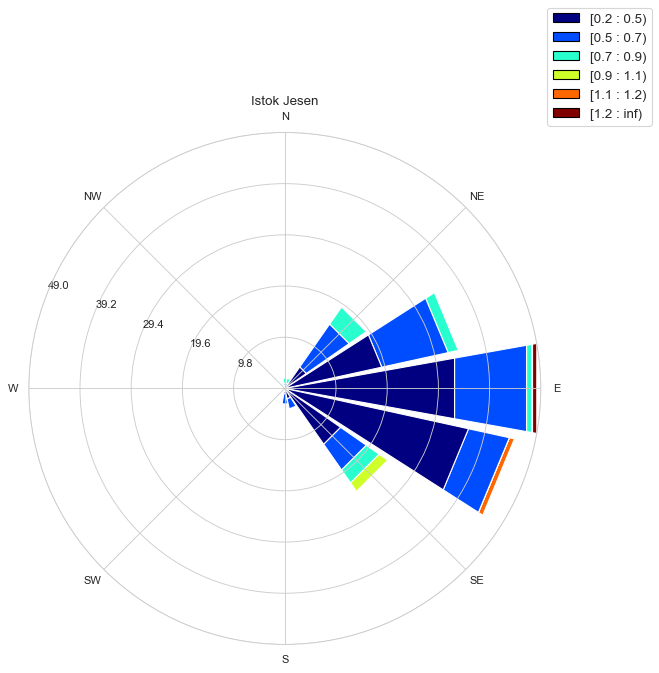

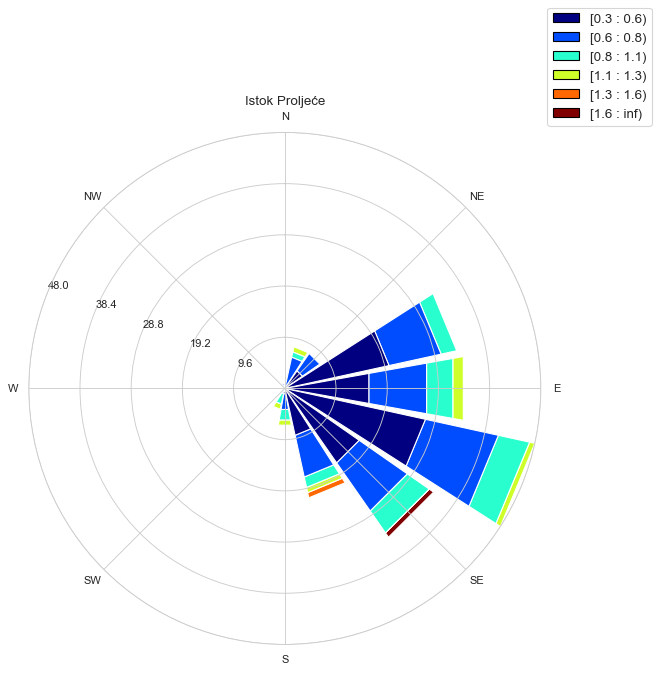

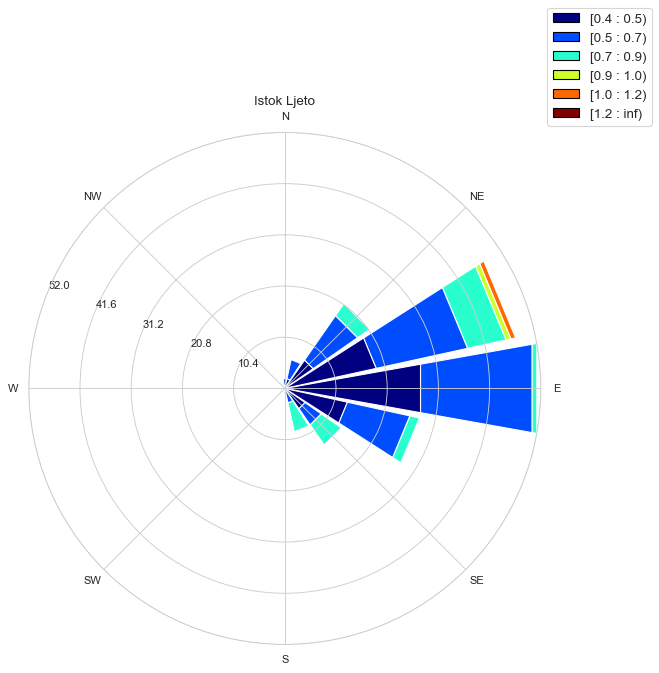

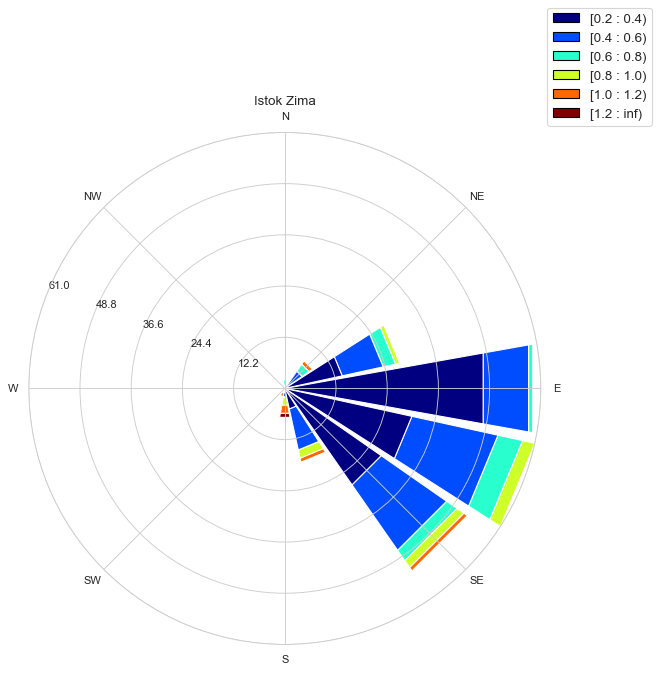

In [51]:
for site,speed,direction in zip(sites,factors_wind_speed,factors_wind_direction):
    for season,tit in zip(seasons,titles):
        graf = windrose_season(site,speed,direction,season,tit)
        
        

# funkcija za linijski graf brzine

In [58]:
def wind_linijski(site_1,speed_1):
    df_fun = df.copy()
    Year = df_fun.index
    x = df_fun[speed_1]
    plt.figure(figsize=(20,8))
    plt.xticks(range(0,805,15),rotation=90)
    plt.plot(Year, x)
    plt.title(site_1)
    plt.xlabel('Date')
    plt.ylabel('Brzina vjetra')
    plt.show()
    


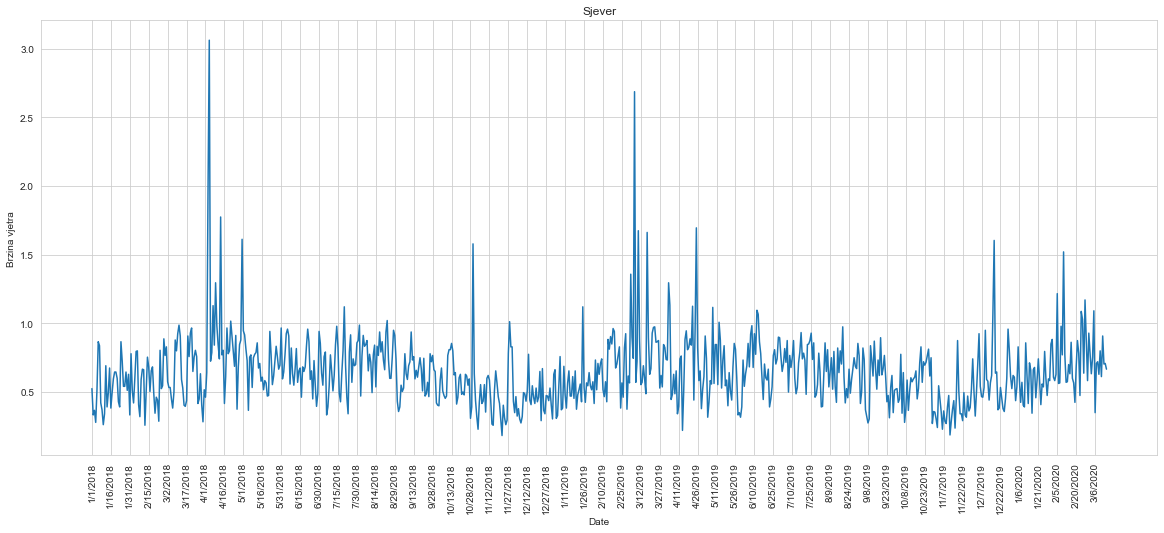

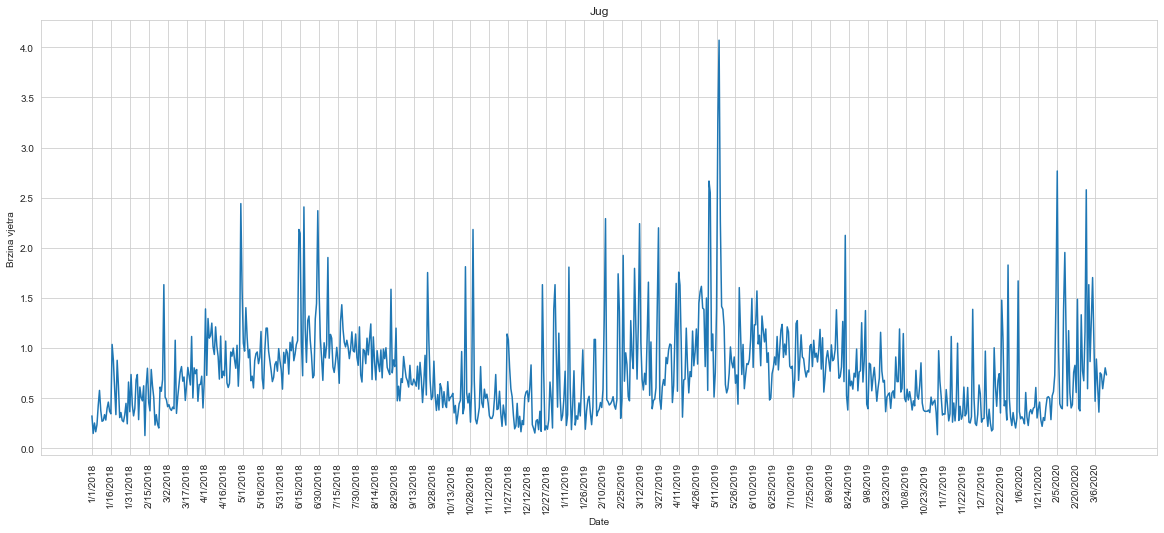

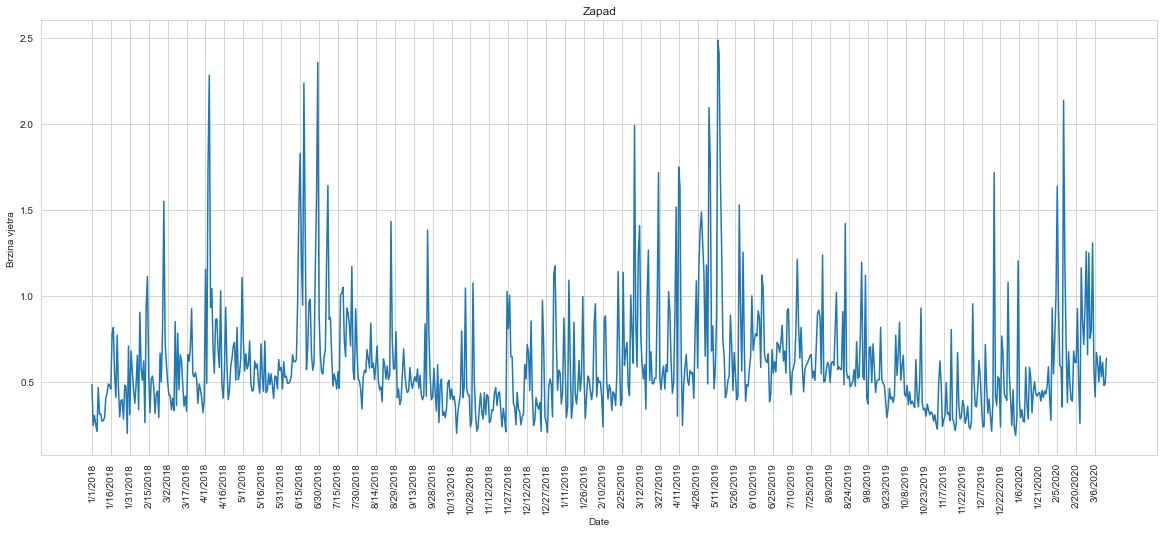

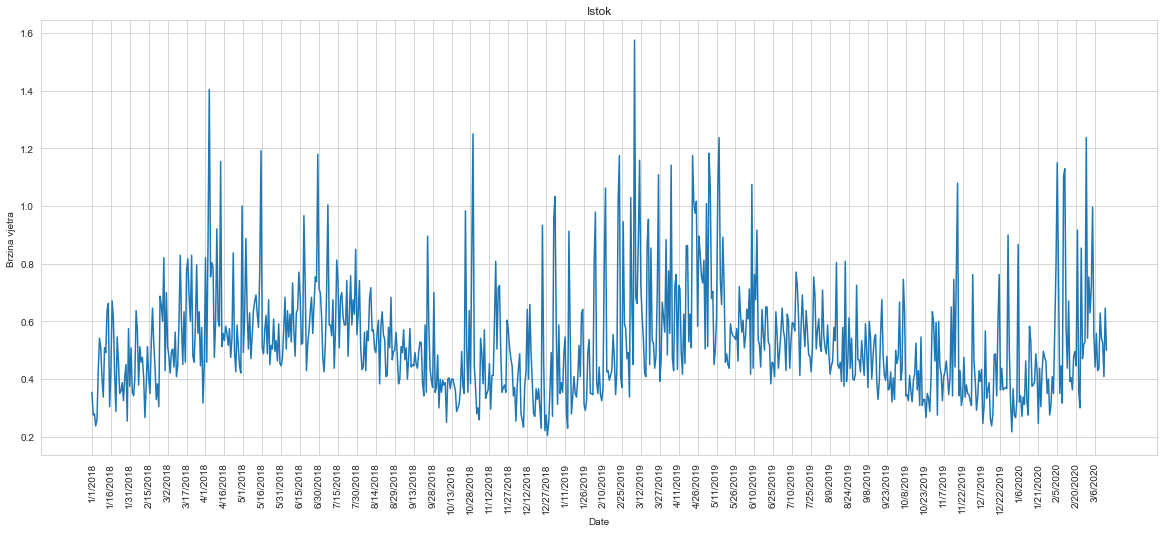

In [59]:
for site,speed in zip(sites,factors_wind_speed):
    graf = wind_linijski(site,speed)

# funkcija histogram brzina vjetra

In [60]:
def wind_hist(site_1,speed_1):
    df_fun = df.copy()
    Year = df_fun.index
    x = df_fun[speed_1]
    plt.figure(figsize=(20,8))
    plt.hist(x, bins = 50, color = "skyblue")
    plt.title(site_1)
    plt.ylabel('Učestalost')
    plt.xlabel('Brzina vjetra')
    plt.show()



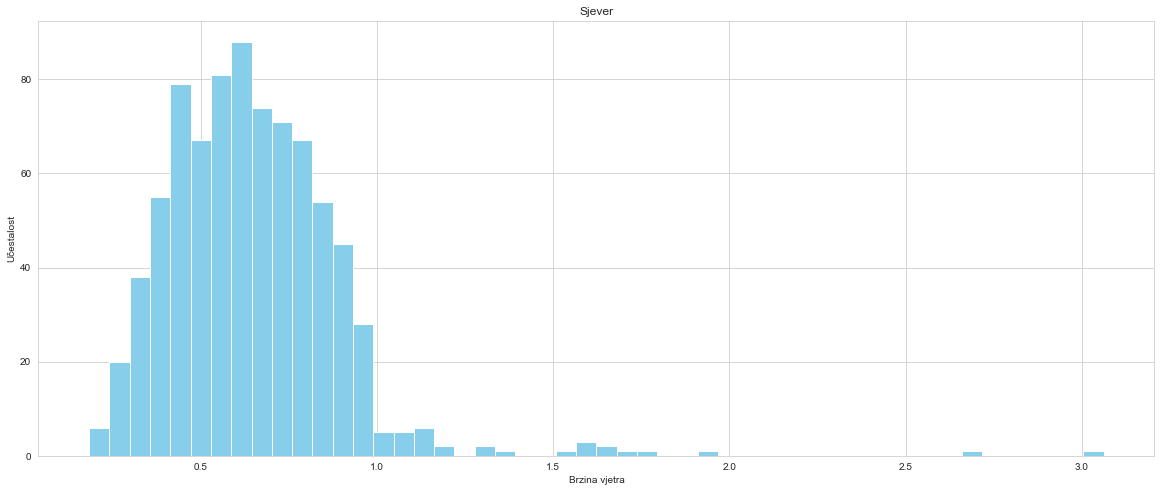

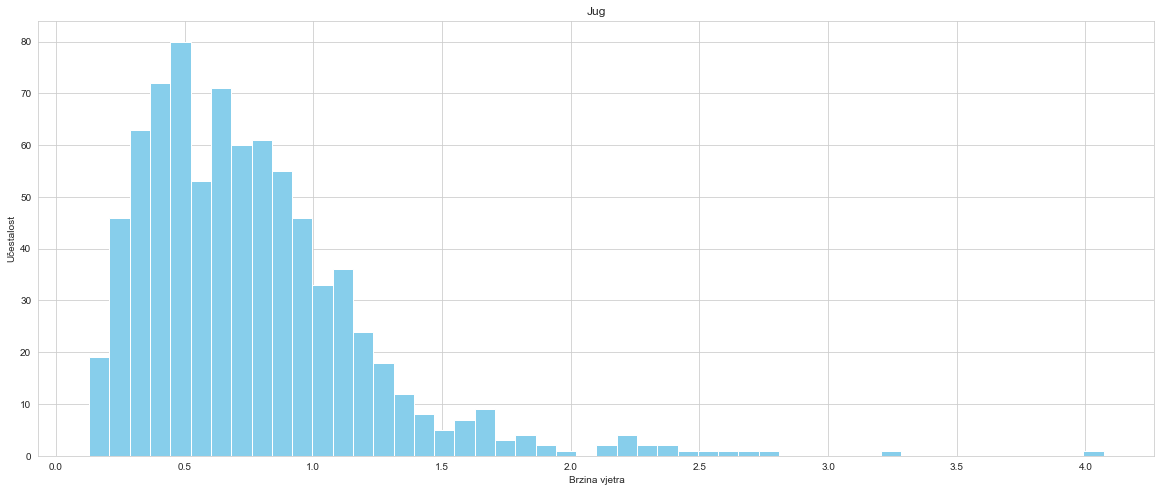

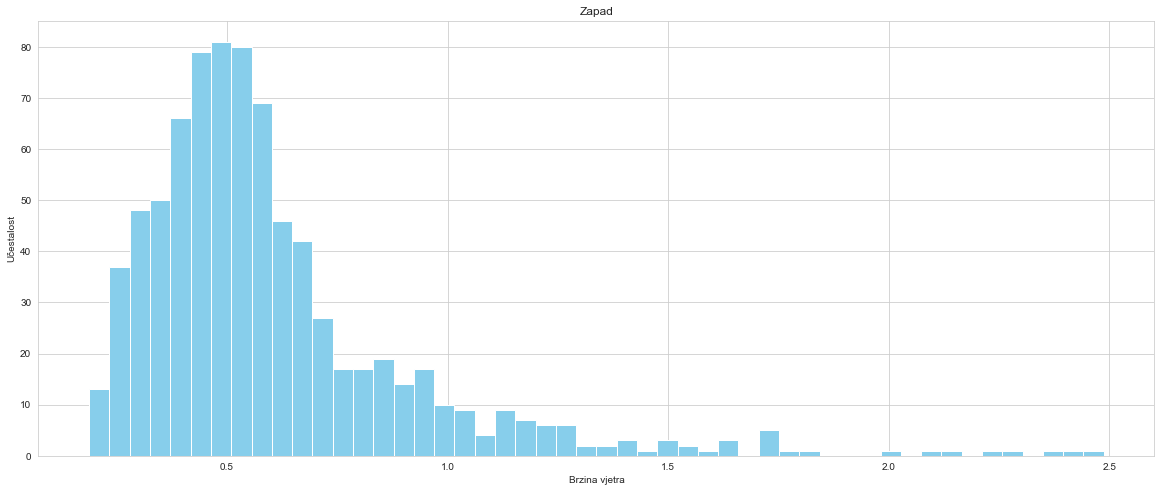

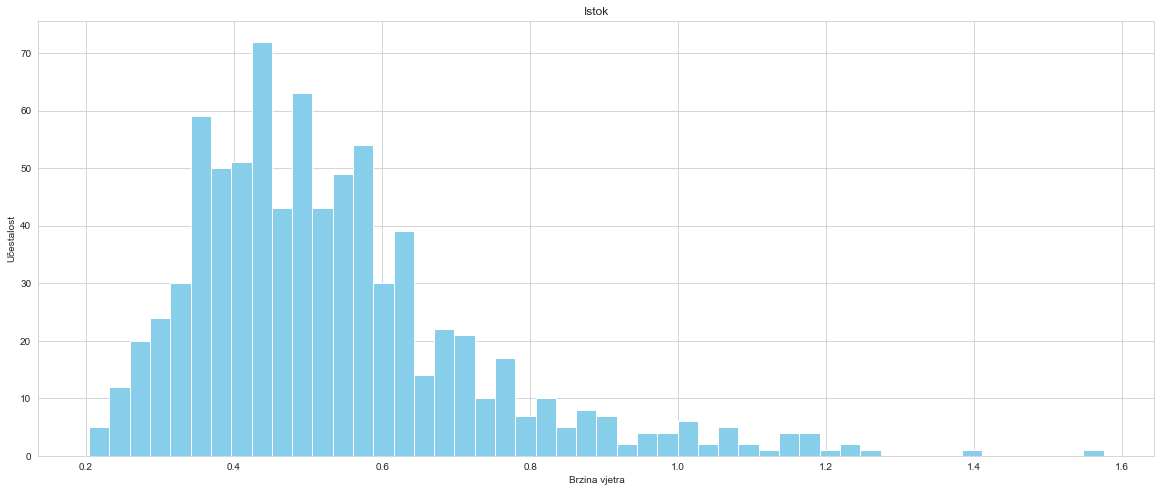

In [61]:
for site,speed in zip(sites,factors_wind_speed):
    graf = wind_hist(site,speed)